In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from util.helpers import melt_df

mls_bpr = pd.read_csv('./output/ranking_algo_exp/ml-latest-small_bpr.csv')
mls_svdpp = pd.read_csv('./output/ranking_algo_exp/ml-latest-small_svdpp.csv')

personality_bpr = pd.read_csv('./output/ranking_algo_exp/personality_bpr.csv')

ml1m_bpr = pd.read_csv('./output/ranking_algo_exp/ml-1m_bpr.csv')

In [ ]:
mls_bpr

AttributeError: 'NoneType' object has no attribute 'remove'

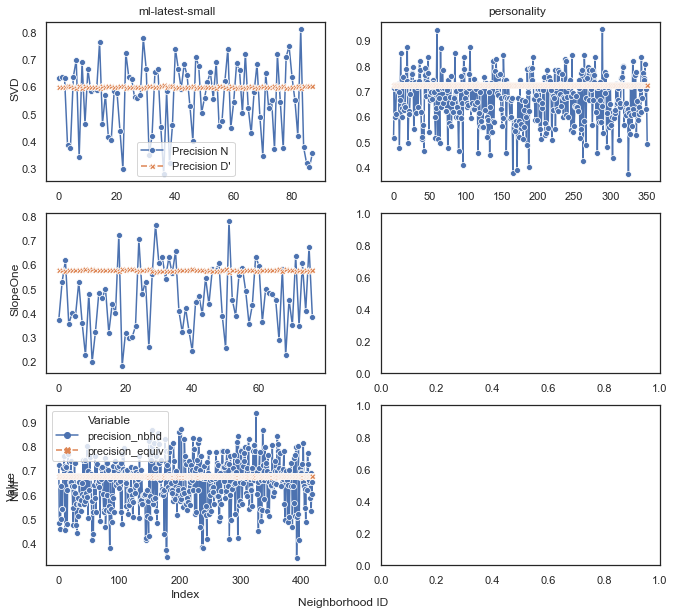

In [7]:
sns.set_theme(style="white") # white, dark, whitegrid, darkgrid, ticks
mls_bpr_prec = melt_df(mls_bpr, ['precision_nbhd','precision_equiv'])
mls_svdpp_prec = melt_df(mls_svdpp, ['precision_nbhd','precision_equiv'])
personality_bpr_prec = melt_df(personality_bpr, ['precision_nbhd','precision_equiv'])
ml1m_bpr_prec = melt_df(ml1m_bpr, ['precision_nbhd','precision_equiv'])

fig, ax = plt.subplots(3,2, figsize=(11, 10))

sns.lineplot(x=mls_bpr_prec.Index, y="Value", hue="Variable", data=mls_bpr_prec, ax=ax[0,0], markers=True, style="Variable")
sns.lineplot(x=mls_svdpp_prec.Index, y="Value", hue="Variable", data=mls_svdpp_prec, ax=ax[1,0], markers=True, style="Variable")
sns.lineplot(x=personality_bpr_prec.Index, y="Value", hue="Variable", data=personality_bpr_prec, ax=ax[2,0], markers=True, style="Variable")
sns.lineplot(x=ml1m_bpr_prec.Index, y="Value", hue="Variable", data=ml1m_bpr_prec, ax=ax[0,1], markers=True, style="Variable")
# sns.lineplot(x=personality_sone_rmse.Index, y="Value", hue="Variable", data=personality_sone_rmse, ax=ax[1,1], markers=True, style="Variable")
# sns.lineplot(x=personality_nmf_rmse.Index, y="Value", hue="Variable", data=personality_nmf_rmse, ax=ax[2,1], markers=True, style="Variable")

# Legend labels
ax[0,0].legend(labels=['Precision N', 'Precision D\''])

fig.text(0.5, 0.07, 'Neighborhood ID', ha='center')
fig.text(0.29, 0.89, 'ml-latest-small', ha='center')
fig.text(0.72, 0.89, 'personality', ha='center')
fig.text(0.08, 0.2337, 'NMF', va='center', rotation='vertical')
fig.text(0.08, 0.51, 'SlopeOne', va='center', rotation='vertical')
fig.text(0.08, 0.788, 'SVD', va='center', rotation='vertical')

for i in range(0, 3):
    for j in range(0, 2):
        # remove all x and y labels
        ax[i,j].set(xlabel=None)
        ax[i,j].set(ylabel=None)

        # only keep legend for first row
        if j == 0 and i == 0:
            continue
        ax[i,j].get_legend().remove()